# Universal bank  Dataset

Based on the personal information we can predict the personal loan sanction rate for every person.
https://www.kaggle.com/sriharipramod/bank-loan-classification

# Q2
1) Train an RF Model

In [61]:
import pandas as pd
from sklearn.ensemble import RaBankndomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [62]:
#Reading the data 
df_uni = pd.read_csv(r'C:\Users\Lokesh Balaji\Desktop\NEU Study\INFO6105\UniversalBank.csv')
df_uni.head


<bound method NDFrame.head of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \

In [63]:
from sklearn.utils import shuffle
df_uni = shuffle(df_uni)

In [64]:
#split the data
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()


In [65]:
print(df_uni.shape)

(5000, 14)


In [147]:
#universal bank personal loan is calculated
x = df_uni.drop('Personal Loan', axis=1)
y = df_uni['Personal Loan']
print(x.shape)
print(y.shape)

(5000, 13)
(5000,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 309 to 2032
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [67]:
#Scaling the data
scaler = preprocessing.StandardScaler().fit(x)
X_test = pd.DataFrame(scaler.transform(x))
#X_con_sc.columns = ["Age","Fare"]
print(X_test)
X_test.head(2)

            0         1         2         3         4         5         6   \
0    -1.517623  1.453636  1.560626  0.374237  1.308656 -1.216855  1.065567   
1     1.230795  0.406700  0.339711  1.764661 -0.205267 -1.216855  3.068447   
2    -0.703559  0.842923  0.862960 -0.733757  0.458842 -0.345432  0.207190   
3     1.628474  1.540880  1.647835  0.982547 -0.859007 -1.216855  0.550541   
4    -1.639559 -1.338194 -1.404454 -0.755483 -1.370404  0.525991 -0.479511   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.616264 -1.599928 -1.491662  0.309061 -0.457431  0.525991 -0.651186   
4996 -0.139603  0.232210  0.339711 -1.407244 -0.246273  1.397414 -0.822862   
4997  1.479518 -1.338194 -1.317246  0.243885 -0.585633 -0.345432  0.321641   
4998 -1.476747  1.540880  1.473418 -0.951011 -0.517761 -0.345432 -0.536736   
4999 -0.323894  1.453636  1.473418 -0.907560 -1.360506  0.525991 -0.994537   

            7         8         9         10        11        1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.517623,1.453636,1.560626,0.374237,1.308656,-1.216855,1.065567,-1.049078,-0.555524,2.928915,-0.25354,0.821951,-0.645314
1,1.230795,0.406700,0.339711,1.764661,-0.205267,-1.216855,3.068447,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632


In [68]:
# spliting the data to for training and validation data set

x_trn,x_val = split_df(X_test,3500)
y_trn,y_val = split_df(y,3500)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)
print(y_trn.head(5))
print(y_val.head(5))

(3500, 13) (1500, 13) (3500,) (1500,)
309     0
4276    0
1484    0
4850    0
133     0
Name: Personal Loan, dtype: int64
2642    0
4543    0
1791    0
2308    0
1       0
Name: Personal Loan, dtype: int64


In [69]:
#RandomforestClassifier(n_estimators = 10)

mod_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_1.fit(x_trn,y_trn)


RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [70]:
y_val_pred = mod_1.predict(x_val)
print(x_val.shape)
print(y_val_pred)
y_val_pred.shape

(1500, 13)
[0 0 0 ... 0 0 0]


(1500,)

In [71]:
#Calculating Accuracy score
y_prd = mod_1.predict(x_val)
accuracy_score(y_val,y_prd)

0.984

<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

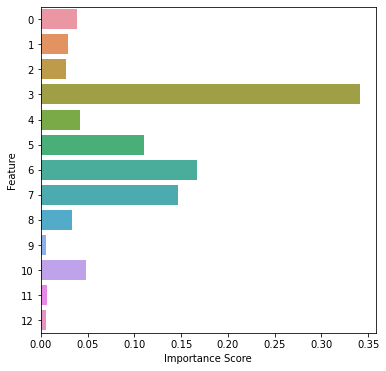

In [72]:
# After training the data set feature importance is calculated 

'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(mod_1.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (6,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")


# Q2 2) Train a DNN

In [73]:
'''Import necessary packages'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing

%matplotlib inline

In [74]:
path='C:\\Users\\Lokesh Balaji\\Desktop\\NEU Study\\INFO6105'

In [78]:
#Reading the data
df_DNN = pd.read_csv(f'{path}\\UniversalBank.csv',header = None)
print(df_DNN.shape)
df_DNN.head(2)

(5001, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
1,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


In [145]:
#SPLIT the data
X_normal = df_DNN.iloc[1:, :13]
Y_normal = df_DNN.iloc[1:, 13:]
X_normal.shape
X_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5000 non-null   object
 1   1       5000 non-null   object
 2   2       5000 non-null   object
 3   3       5000 non-null   object
 4   4       5000 non-null   object
 5   5       5000 non-null   object
 6   6       5000 non-null   object
 7   7       5000 non-null   object
 8   8       5000 non-null   object
 9   9       5000 non-null   object
 10  10      5000 non-null   object
 11  11      5000 non-null   object
 12  12      5000 non-null   object
dtypes: object(13)
memory usage: 507.9+ KB


In [148]:
# Scaling the data
scaler = preprocessing.StandardScaler().fit(x)
X_sn = pd.DataFrame(scaler.transform(x))
#X_con_sc.columns = ["Age","Fare"]
print(X_sn)
X_sn.head(2)

            0         1         2         3         4         5         6   \
0    -1.517623  1.453636  1.560626  0.374237  1.308656 -1.216855  1.065567   
1     1.230795  0.406700  0.339711  1.764661 -0.205267 -1.216855  3.068447   
2    -0.703559  0.842923  0.862960 -0.733757  0.458842 -0.345432  0.207190   
3     1.628474  1.540880  1.647835  0.982547 -0.859007 -1.216855  0.550541   
4    -1.639559 -1.338194 -1.404454 -0.755483 -1.370404  0.525991 -0.479511   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.616264 -1.599928 -1.491662  0.309061 -0.457431  0.525991 -0.651186   
4996 -0.139603  0.232210  0.339711 -1.407244 -0.246273  1.397414 -0.822862   
4997  1.479518 -1.338194 -1.317246  0.243885 -0.585633 -0.345432  0.321641   
4998 -1.476747  1.540880  1.473418 -0.951011 -0.517761 -0.345432 -0.536736   
4999 -0.323894  1.453636  1.473418 -0.907560 -1.360506  0.525991 -0.994537   

            7         8         9         10        11        1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.517623,1.453636,1.560626,0.374237,1.308656,-1.216855,1.065567,-1.049078,-0.555524,2.928915,-0.25354,0.821951,-0.645314
1,1.230795,0.406700,0.339711,1.764661,-0.205267,-1.216855,3.068447,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632


In [149]:
# Train- Test Split
(X_trainm, X_test, Y_trainm, Y_test) = train_test_split(x, y, test_size=0.40, random_state=1)
print(X_trainm.shape,X_test.shape,Y_trainm.shape,Y_test.shape)


(3000, 13) (2000, 13) (3000,) (2000,)


In [150]:
(X_Valid_n, X_Test_n, Y_Valid_n, Y_Test_n) = train_test_split(X_test, Y_test, test_size=0.50, random_state=1)
print(X_Valid_n.shape,X_Test_n.shape,Y_Valid_n.shape,Y_Test_n.shape)

(1000, 13) (1000, 13) (1000,) (1000,)


In [151]:
# Build the deep neural network
model_nor = Sequential()
model_nor.add(Dense(10, input_dim=13, kernel_initializer='glorot_uniform', activation='relu'))
model_nor.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
model_nor.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [152]:
# Compile the DNN

model_nor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [153]:
# Fit the DNN with your train data

DNN_model_nor= model_nor.fit(X_trainm, Y_trainm, validation_data=(X_Valid_n, Y_Valid_n), epochs=100, batch_size=5)

Epoch 1/100
600/600 [==============================] - 3s 3ms/step - loss: 2413.1549 - accuracy: 0.6832 - val_loss: 22.7892 - val_accuracy: 0.9160
Epoch 2/100
600/600 [==============================] - 1s 1ms/step - loss: 29.3375 - accuracy: 0.8472 - val_loss: 20.4238 - val_accuracy: 0.9160
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 35.9802 - accuracy: 0.8456 - val_loss: 38.8183 - val_accuracy: 0.9160
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 25.6370 - accuracy: 0.8561 - val_loss: 5.1924 - val_accuracy: 0.9150
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 22.5438 - accuracy: 0.8514 - val_loss: 16.5388 - val_accuracy: 0.9160
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 21.1284 - accuracy: 0.8596 - val_loss: 3.4988 - val_accuracy: 0.8920
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 27.7208 - accuracy: 0.8510 - val_loss: 4.7190 - val_acc

600/600 [==============================] - 1s 1ms/step - loss: 7.6919 - accuracy: 0.8910 - val_loss: 12.3950 - val_accuracy: 0.9160
Epoch 58/100
600/600 [==============================] - 1s 1ms/step - loss: 7.2406 - accuracy: 0.8835 - val_loss: 5.9933 - val_accuracy: 0.9180
Epoch 59/100
600/600 [==============================] - 1s 1ms/step - loss: 10.3641 - accuracy: 0.8791 - val_loss: 2.6506 - val_accuracy: 0.9270
Epoch 60/100
600/600 [==============================] - 1s 985us/step - loss: 9.7279 - accuracy: 0.8696 - val_loss: 15.9642 - val_accuracy: 0.9160
Epoch 61/100
600/600 [==============================] - 1s 1ms/step - loss: 11.2802 - accuracy: 0.8727 - val_loss: 6.5124 - val_accuracy: 0.9170
Epoch 62/100
600/600 [==============================] - 1s 1ms/step - loss: 6.1401 - accuracy: 0.8933 - val_loss: 21.3634 - val_accuracy: 0.9160
Epoch 63/100
600/600 [==============================] - 1s 1ms/step - loss: 7.5843 - accuracy: 0.8784 - val_loss: 10.8209 - val_accuracy: 0.91

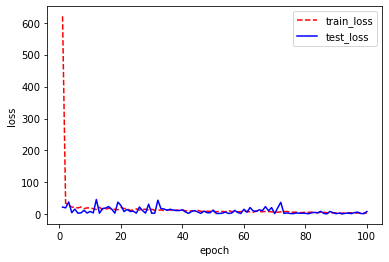

In [155]:
#epoch vs loss
import matplotlib.pyplot as plt

train_loss = DNN_model_nor.history['loss']
test_loss = DNN_model_nor.history['val_loss']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['train_loss','test_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();


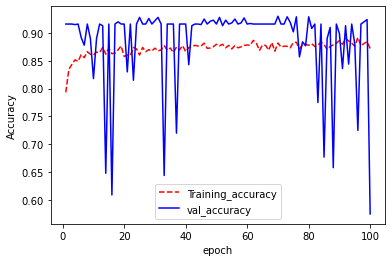

In [157]:
#epoch vs accuracy
import matplotlib.pyplot as plt

train_loss = DNN_model_nor.history['accuracy']
test_loss = DNN_model_nor.history['val_accuracy']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['Training_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show();

In [158]:
# Evaluate the model
scores = model_nor.evaluate(X_Test_n, Y_Test_n)
print ("Accuracy: %.2f%%" %(scores[1]*100))

32/32 [==============================] - 0s 2ms/step - loss: 9.1371 - accuracy: 0.5820
Accuracy: 58.20%


# Q2 3) Hybrid DNN and RF Model

In [160]:
df_hyb = pd.read_csv(f'{path}\\UniversalBank.csv',header = None)
print(df_hyb.shape)
df_hyb.head()

(5001, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
1,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
2,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
3,3,39,15,11,94720,1,1,1,0,0,0,0,0,0
4,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0


In [171]:
# spliting the data to for training and validation data set
x_trn,x_val = split_df(x,3500)
y_trn,y_val = split_df(y,3500)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(3500, 13) (1500, 13) (3500,) (1500,)


In [172]:
#RandomforestClassifier(n_estimators = 10)

mod_hyb_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
mod_hyb_1.fit(x_trn,y_trn)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [173]:
y_val_pred = mod_hyb_1.predict(x_val)
print(x_val.shape)
print(y_val_pred)
y_val_pred.shape

(1500, 13)
[0 0 0 ... 0 0 0]


(1500,)

In [174]:
#Calculating Accuracy score
y_prd = mod_hyb_1.predict(x_val)
accuracy_score(y_val,y_prd)

0.9853333333333333

<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

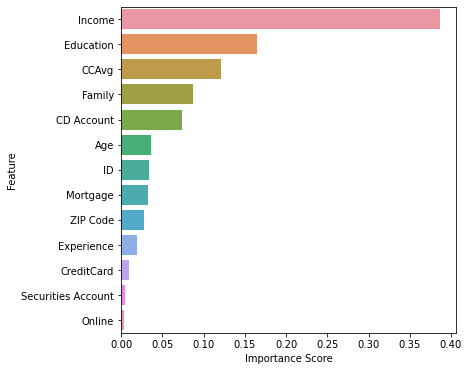

In [175]:
# After training the data set feature importance is calculated 

'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(mod_hyb_1.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (6,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

In [182]:
df_hybrid_2 = df_uni[['Income','Education','CCAvg','Family','CD Account','Age','Personal Loan']]

In [183]:
df_hybrid_2.shape

(5000, 7)

In [184]:
x_hybrid = df_hybrid_2.drop('Personal Loan',axis=1)
y_hybrid = df_hybrid_2['Personal Loan']
print(x_hybrid.shape)
print(y_hybrid.shape)

(5000, 6)
(5000,)


In [200]:
# Train- Test Split
(X_train_h, X_test_h, Y_train_h, Y_test_h) = train_test_split(x_hybrid, y_hybrid, test_size=0.40, random_state=1)
print(X_train_h.shape,X_test_h.shape,Y_train_h.shape,Y_test_h.shape)


(3000, 6) (2000, 6) (3000,) (2000,)


In [205]:
# Build the deep neural network
model_nor_hyb = Sequential()
model_nor_hyb.add(Dense(10, input_dim=6, kernel_initializer='glorot_uniform', activation='relu'))
model_nor_hyb.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
model_nor_hyb.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [206]:
# Compile the DNN

model_nor_hyb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [207]:
# Fit the DNN with your train data

DNN_model_hyb= model_nor_hyb.fit(X_train_h, Y_train_h, validation_data=(X_test_h, Y_test_h), epochs=100, batch_size=5)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 0.9698 - accuracy: 0.8992 - val_loss: 0.2592 - val_accuracy: 0.8835
Epoch 2/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2765 - accuracy: 0.8831 - val_loss: 0.2393 - val_accuracy: 0.8980
Epoch 3/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2370 - accuracy: 0.8994 - val_loss: 0.2361 - val_accuracy: 0.9070
Epoch 4/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2732 - accuracy: 0.8943 - val_loss: 0.2255 - val_accuracy: 0.9120
Epoch 5/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2426 - accuracy: 0.9052 - val_loss: 0.2316 - val_accuracy: 0.9040
Epoch 6/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2306 - accuracy: 0.9010 - val_loss: 0.2020 - val_accuracy: 0.9240
Epoch 7/100
600/600 [==============================] - 1s 1ms/step - loss: 0.2110 - accuracy: 0.9132 - val_loss: 0.2095 - val_accuracy: 0.9155

Epoch 58/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0845 - accuracy: 0.9701 - val_loss: 0.0716 - val_accuracy: 0.9765
Epoch 59/100
600/600 [==============================] - 1s 1ms/step - loss: 0.1010 - accuracy: 0.9638 - val_loss: 0.0916 - val_accuracy: 0.9695
Epoch 60/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0792 - accuracy: 0.9752 - val_loss: 0.0988 - val_accuracy: 0.9640
Epoch 61/100
600/600 [==============================] - 1s 1ms/step - loss: 0.1026 - accuracy: 0.9605 - val_loss: 0.0831 - val_accuracy: 0.9690
Epoch 62/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0792 - accuracy: 0.9702 - val_loss: 0.0661 - val_accuracy: 0.9740
Epoch 63/100
600/600 [==============================] - 1s 1ms/step - loss: 0.1055 - accuracy: 0.9609 - val_loss: 0.0757 - val_accuracy: 0.9725
Epoch 64/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0990 - accuracy: 0.9672 - val_loss: 0.0701 - val_accuracy:

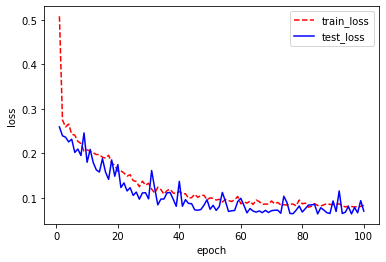

In [208]:
#epoch vs loss
import matplotlib.pyplot as plt

train_loss = DNN_model_hyb.history['loss']
test_loss = DNN_model_hyb.history['val_loss']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['train_loss','test_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

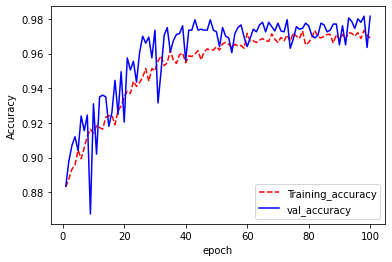

In [209]:
#epoch vs accuracy
import matplotlib.pyplot as plt

train_loss = DNN_model_hyb.history['accuracy']
test_loss = DNN_model_hyb.history['val_accuracy']

epoch_counter = range(1, len(train_loss)+1)

plt.plot(epoch_counter,train_loss,'r--')
plt.plot(epoch_counter,test_loss,'b-')
plt.legend(['Training_accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show();

In [215]:
# Evaluate the model
scores = model_nor_hyb.evaluate(X_test_h, Y_test_h)
print ("Accuracy: %.2f%%" %(scores[1]*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9815
Accuracy: 98.15%


Two ways of ensembling the DNN and RF's together is through
1) Bagging
2) Stacking

Rf model Accuracy score: 98.4%
DNN model Accuracy score: 58.20%
Hybrid model Accuracy: 98.15%
    
Here for the hybrid DNN and RF model important columns had been taken theough feature extraction in rf and that has been used
in DNN mdel to create an hybrid DNN and RF model.
In my case the RF model has the better accuracy and the hybrid model comes second to it.